In [13]:
############################################
#### 차트에 한글 사용하기 위하여
#############################################
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [7]:
########################################
### face1.h5 모델_불러오기
### face1.h5 모델은  '고개숙임' =>1, '앞얼굴'=>2, '옆얼굴'=>3 으로 softmax로 예측된 모델임
########################################

import tensorflow as tf
face_model=tf.keras.models.load_model('C:/data/video/face1.h5')

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [2]:
URL = 'C:/data/video/영상.mp4'

In [3]:
#########################################################################
#### 참고: open CV를 이용하여서 영상정보 얻기
#### 이 정보를 이용하면 fps 별로 자료를 저장하면 1초에 한장 꼴로 사진이 저장되면서 총 15~16장의 사진만 저장할수 있음.
#########################################################################
import cv2
cap = cv2.VideoCapture(URL)
if not cap.isOpened():
  print("could not open :", infilename)
  exit(0)
 
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))   # 영상의 전체프레임수(한장한장사진의 전체갯수)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))    # 영상너비
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 영상 높이
fps = cap.get(cv2.CAP_PROP_FPS)                  # frame per second (초당 프레임수) 24개
 
print('length : ', length)
print('width : ', width)
print('height : ', height)
print('fps : ', fps)

length :  375
width :  720
height :  1280
fps :  24.0


In [4]:
#############################################################
######  얼굴판별 함수
###########################################################
import numpy as np

def model_dab(img):
  re=img.reshape(1,180,180,3)     # 텐서에 넣기 위해서 맨앞 1을 확장함. (180,180,3)사진을
  predict=face_model.predict(re)       # 모델을 예측함. softmax함수에 의해서 3가지 경우의 수의 확률값이 출력됨
  predict_num=np.argmax(predict)       # 3개의 확률중 가장 큰 값을 갖고 있는 위치값을 갖고옴

  class_name=['고개숙임','앞얼굴','옆얼굴']
  return class_name[predict_num]

In [5]:
############################################
## 폴더생성, 캡처된 사진 저장용
############################################
def save_folder(folder):
  import os
  import shutil

  MODEL_DIR = './' + folder + '/'
  # 폴더삭제(자료가 있어도 삭제함)
  if os.path.exists(MODEL_DIR):
      shutil.rmtree(MODEL_DIR)

  # 새로 폴더만듦
  os.mkdir(MODEL_DIR)

In [13]:
# https://m.blog.naver.com/dldudcks1779/222064172394

################################################################
############# 375개의 모든 프레임 저장
################################################################
import matplotlib.pyplot as plt
import cv2
face=[]
vidcap = cv2.VideoCapture(URL)
folderName='face_caputre_모든프레임'
save_folder(folderName)

count = 0

while(vidcap.isOpened()):
  try:
    ret, image = vidcap.read()
    img = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)  # 원본영상이 회전되어 있는 영상이라 우측으로90도 회전함(상황에 따라 작업함)
    resize_frame = cv2.resize(img, (180, 180))   #사이즈 조정 180,180으로
    result = model_dab(resize_frame)  #모델에 넣어서 결과보기
    fileName = './'+folderName +'/' +  result + '_' + str(count).zfill(3)+ '.jpg'
    cv2.imwrite(fileName,resize_frame)
    face.append(result)
    count += 1
  except:
    break
vidcap.release()


1/1 [==============================] - 0s 58ms/step


In [14]:
# https://m.blog.naver.com/dldudcks1779/222064172394

################################################################
############# 초당 1개의 사진만 저장, 24프레임으로 나누어서 저장하면 됨
################################################################
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
import cv2
face_second=[]
vidcap = cv2.VideoCapture(URL)
folderName='face_caputre_초당1장'
save_folder(folderName)


count = 0
 
while(vidcap.isOpened()):
    try:
      ret, image = vidcap.read()
      
      if count%24==0:
        print(count)

        img=cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)  # 원본영상이 회전되어 있는 영상이라 우측으로90도 회전함(상황에 따라 작업함)
        resize_frame = cv2.resize(img, (180, 180))   #사이즈 조정 180,180으로
        result=model_dab(resize_frame)  #모델에 넣어서 결과보기
        fileName='./'+folderName +'/' +  result + '_' + str(count).zfill(3)+ '.jpg'
        cv2.imwrite(fileName,resize_frame)
        face_second.append(result)

      count += 1
    except:
      break
 
vidcap.release()

0
1/1 [==============================] - 0s 54ms/step
24
1/1 [==============================] - 0s 56ms/step
48
1/1 [==============================] - 0s 57ms/step
72
1/1 [==============================] - 0s 56ms/step
96
1/1 [==============================] - 0s 56ms/step
120
1/1 [==============================] - 0s 60ms/step
144
1/1 [==============================] - 0s 57ms/step
168
1/1 [==============================] - 0s 56ms/step
192
1/1 [==============================] - 0s 55ms/step
216
1/1 [==============================] - 0s 56ms/step
240
1/1 [==============================] - 0s 59ms/step
264
1/1 [==============================] - 0s 54ms/step
288
1/1 [==============================] - 0s 69ms/step
312
1/1 [==============================] - 0s 56ms/step
336
1/1 [==============================] - 0s 58ms/step
360
1/1 [==============================] - 0s 60ms/step
384


In [15]:
print('전체frame수=>',len(face), '\n24로나누어서 저장한 frame수=>',len(face_second))

전체frame수=> 375 
24로나누어서 저장한 frame수=> 16


(array(['고개숙임', '앞얼굴', '옆얼굴'], dtype='<U4'), array([279,  16,  80], dtype=int64))
chart[0]=> ['고개숙임' '앞얼굴' '옆얼굴']
chart[1]=> [279  16  80]


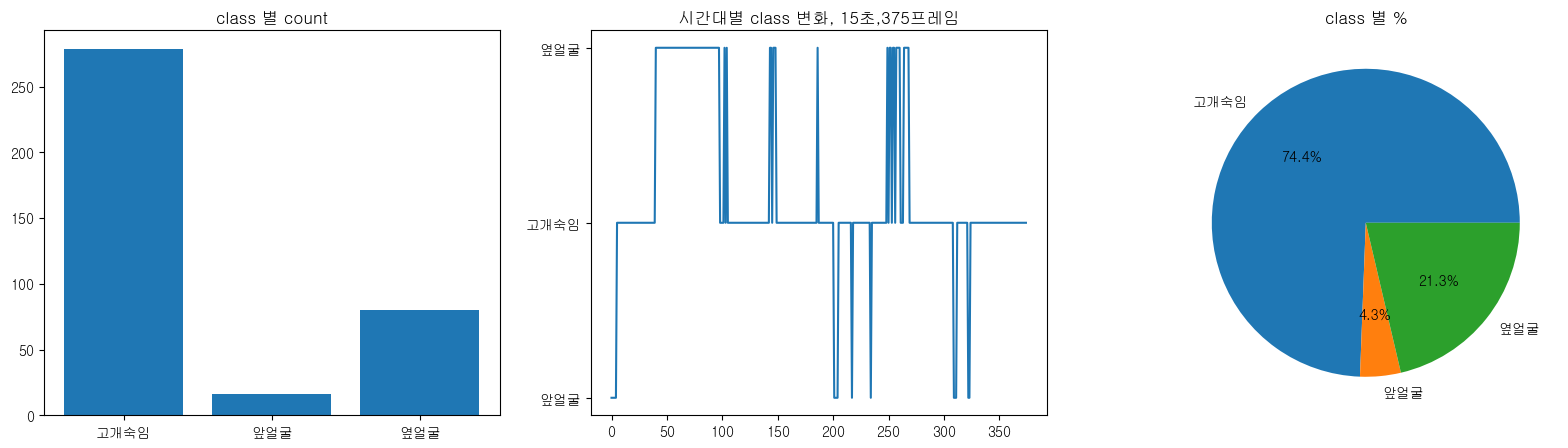

In [16]:
###################################################
###### 차트작성: 모든 프레임자료로 face자료
####################################################

chart=np.unique(face,return_counts=True)
print(chart)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.bar(chart[0],chart[1])
plt.title('class 별 count')


plt.subplot(1,3,2)
plt.plot(face)
plt.title('시간대별 class 변화, 15초,375프레임')


print('chart[0]=>',chart[0])
print('chart[1]=>',chart[1])

plt.subplot(1,3,3)
label, value=chart[0],chart[1]

plt.pie(value, labels=label, autopct='%.1f%%')
plt.title('class 별 %')
plt.show()

(array(['고개숙임', '앞얼굴', '옆얼굴'], dtype='<U4'), array([10,  1,  5], dtype=int64))


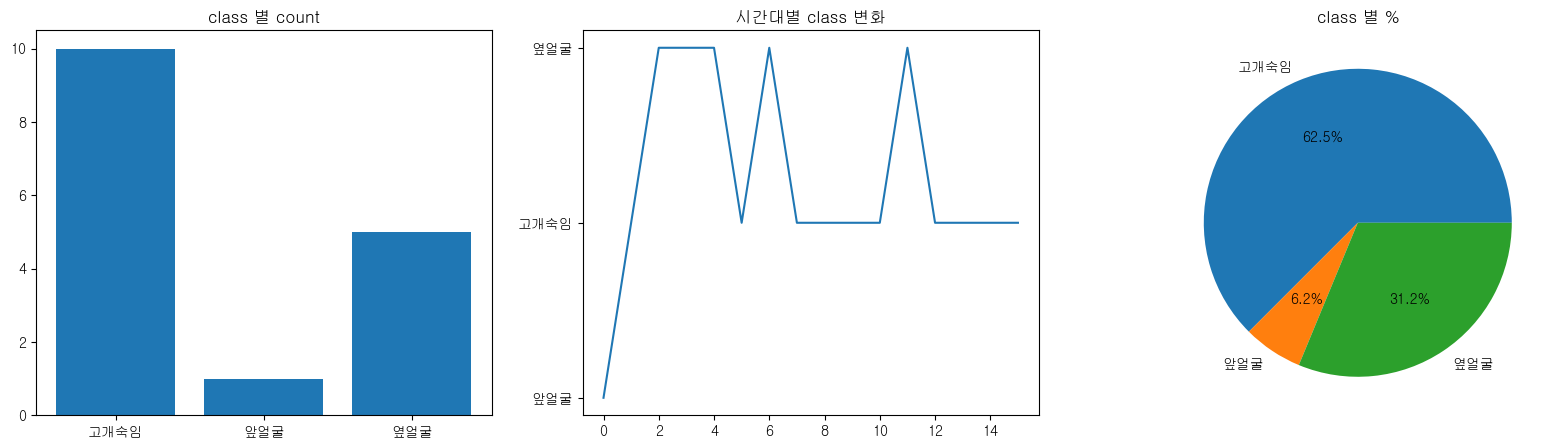

In [17]:
###################################################
###### 차트작성: 초당자료로
####################################################

chart_second=np.unique(face_second,return_counts=True)
print(chart_second)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.bar(chart_second[0],chart_second[1])
plt.title('class 별 count')


plt.subplot(1,3,2)
plt.plot(face_second)
plt.title('시간대별 class 변화')

plt.subplot(1,3,3)
label, value=chart_second[0],chart_second[1]

plt.pie(value, labels=label, autopct='%.1f%%')
plt.title('class 별 %')
plt.show()